In [18]:
!nvidia-smi

Tue Feb  6 03:18:01 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
|  0%   37C    P8    14W / 250W |   1906MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:02:00.0 Off |                  N/A |
|  0%   

In [5]:
import PIL.Image as Image
from tqdm import tqdm
import os
import cv2
import numpy as np

In [6]:
PATH = "../data/afw"

pointers = {}

list_pointers = [x for x in os.listdir(PATH) if x.endswith('pts')]

for pointer in list_pointers:
    if((pointer[-6:] == '_1.pts') or (pointer[-6:] == '_2.pts')):
        pointers[str(pointer[:-6])] = {}

for pointer_name in tqdm(list_pointers):
    pointer_name_split = pointer_name.split('_')
    key = pointer_name_split[0]
    number = pointer_name_split[1].replace('.pts','')

    pointers[key][number] = f"{PATH}/{pointer_name}"

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 337/337 [00:00<00:00, 847410.34it/s]


In [7]:
count = 0
for key in pointers.keys():
    count += len(pointers[key])
print(f"Face quantity: {count}")

Face quantity: 337


In [52]:
pointers

{'4970182488': {'1': '../data/afw/4970182488_1.pts'},
 '5065140719': {'2': '../data/afw/5065140719_2.pts',
  '1': '../data/afw/5065140719_1.pts'},
 '70037463': {'2': '../data/afw/70037463_2.pts',
  '1': '../data/afw/70037463_1.pts'},
 '878985234': {'1': '../data/afw/878985234_1.pts'},
 '5151536225': {'1': '../data/afw/5151536225_1.pts',
  '2': '../data/afw/5151536225_2.pts'},
 '2239259': {'1': '../data/afw/2239259_1.pts'},
 '378492784': {'2': '../data/afw/378492784_2.pts',
  '1': '../data/afw/378492784_1.pts'},
 '5082623456': {'2': '../data/afw/5082623456_2.pts',
  '1': '../data/afw/5082623456_1.pts',
  '3': '../data/afw/5082623456_3.pts'},
 '24795717': {'3': '../data/afw/24795717_3.pts',
  '2': '../data/afw/24795717_2.pts',
  '1': '../data/afw/24795717_1.pts'},
 '955659370': {'2': '../data/afw/955659370_2.pts',
  '1': '../data/afw/955659370_1.pts'},
 '347629355': {'1': '../data/afw/347629355_1.pts',
  '2': '../data/afw/347629355_2.pts'},
 '79378097': {'5': '../data/afw/79378097_5.pts'

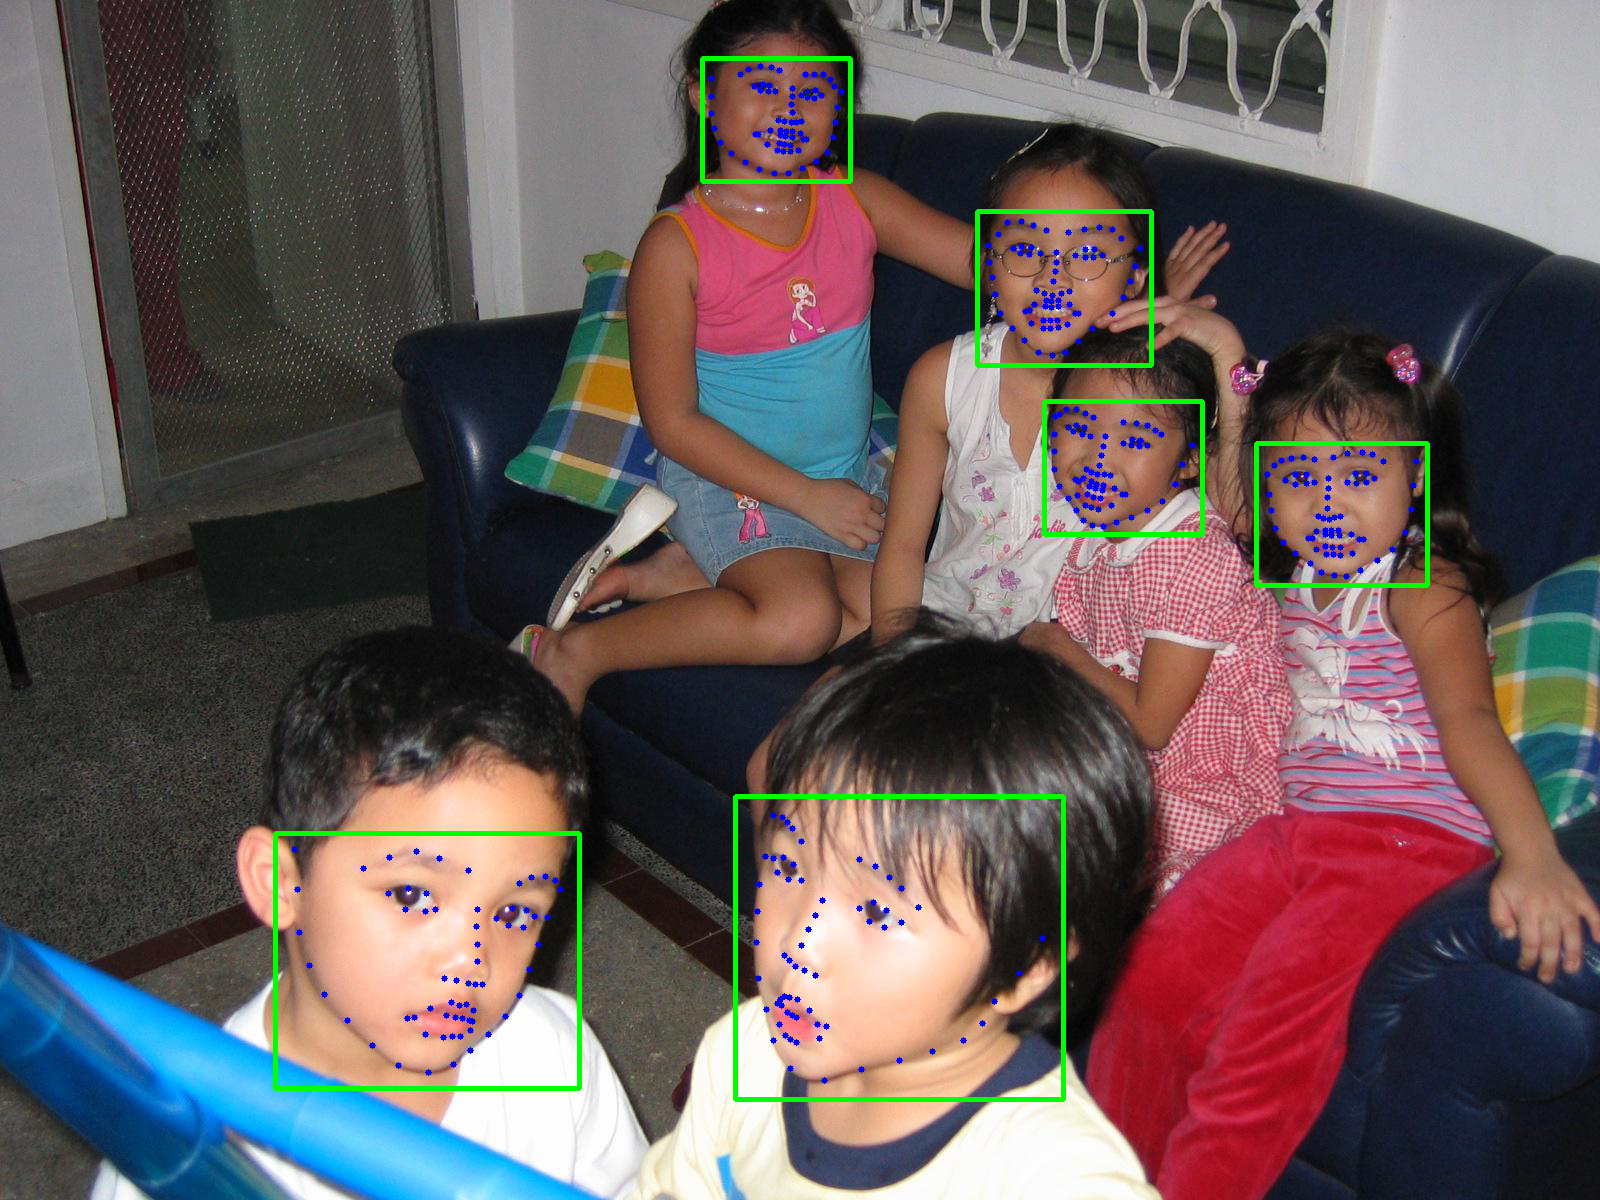

In [53]:
key = '79378097'

img = Image.open(f'{PATH}/{key}_1.jpg').convert("RGB")
img = np.array(img)

for sub_key in list(pointers[key].keys()):
    landmark_pointer = []
    with open(pointers[key][sub_key],'r') as infile:
        for _ in range(3):
            infile.readline()
    
        line = infile.readline().replace('\n','')
        while(line != '}'):
            landmark_pointer.append([int(float(x)) for x in line.split(" ")])
            line = infile.readline().replace('\n','')
    
    aux_tranpose = np.array(landmark_pointer).T
    x_min,y_min = aux_tranpose[0].min(),aux_tranpose[1].min()
    x_max,y_max = aux_tranpose[0].max(),aux_tranpose[1].max()
    
    aumento = 1.15
    
    var_x = int((x_max-x_min)*(aumento - 1)/2)
    var_y = int((y_max-y_min)*(aumento - 1)/2)
    cv2.rectangle(img,(x_min-var_x,y_min-var_y),(x_max+var_x,y_max+var_y),(0,255,0),3)

    for x,y in landmark_pointer:
        cv2.circle(img,(x,y),3,(0, 0, 255),-1)

Image.fromarray(img)
